## Simple linear regression
# What steps we follow
1. Read the dataset
2. EDA, Feature engineering (FE)
3. Divide our dataset into independent and dependent features
4. Further divide the dataset into train and test
5. standard scaling on the train and test data
6. Model Training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


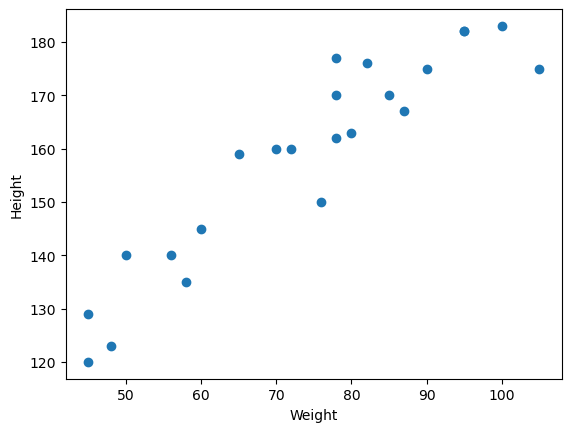

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
## EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
## Divide our dataset into independent and dependent features
x = df[['Weight']] # Independent feature
y = df['Height'] ## dependent feature

In [10]:
x.shape, y.shape

((23, 1), (23,))

In [11]:
## train and test data
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=42)

In [13]:
x_train.shape, x_test.shape

((18, 1), (5, 1))

In [14]:
y_train.shape, y_test.shape

((18,), (5,))

In [15]:
## standard scaling
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)

In [19]:
x_test = scaler.transform(x_test)

In [20]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

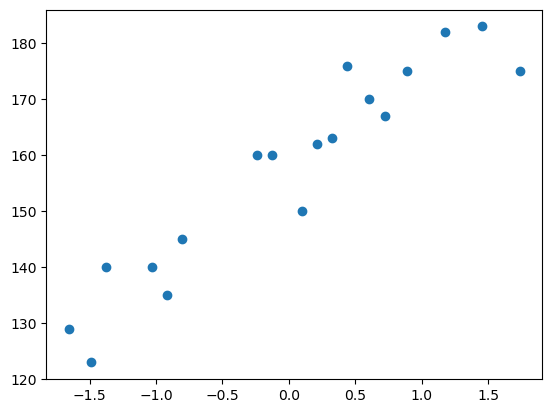

In [22]:
plt.scatter(x_train, y_train)

In [23]:
## Model Training
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

In [25]:
## fitting or training the train data
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
## theta 0
regressor.intercept_

157.5

In [29]:
## theta 1
regressor.coef_

array([17.03440872])

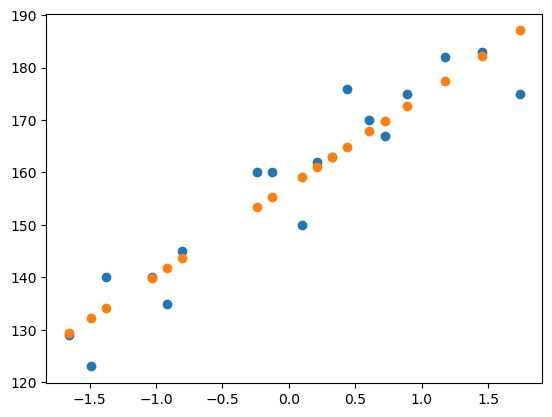

In [31]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, regressor.predict(x_train))

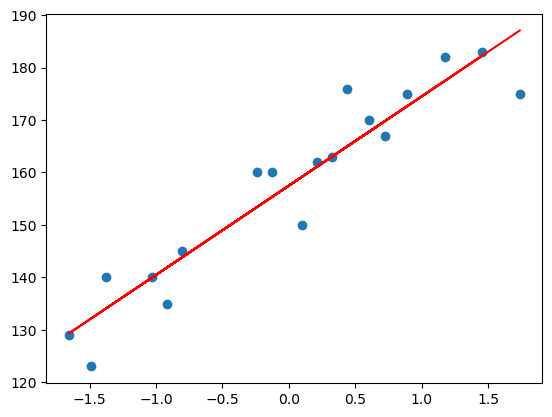

In [34]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), 'r')

### Prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(x_train)

### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(x_test)

In [35]:
## Prediction for test data
y_pred_test = regressor.predict(x_test)

In [36]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [37]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE, MSE ,RMSE

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r squared
## R square Formula
**R^2 = 1 - SSR/SST**
- R^2 = Accuracy of the model
- SSR = Sum of squares of residuals
- SST = total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test,y_pred_test)

In [42]:
score

0.776986986042344

## Adjusted R square formula
**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**
where:
- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [43]:
# display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [44]:
scaler

StandardScaler()

In [45]:
regressor

LinearRegression()